In [1]:
import os
import h5py as h5
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path_data = "../data/pore-detection/Pinnrpobe_komplett/pinnprobe_01.h5"
path_pred = "../predict/pore_run_002/best_checkpoint/pinprobe_01_predictions.h5"

assert  os.path.exists(path_data), os.path.exists(path_seg)

In [4]:
data = {}
with h5.File(os.path.join(path_data),"r") as f:
    print(f.keys())
    for key in f.keys():
        print(key)
        print(f[key].shape)
        data[key] = f[key][:]

<KeysViewHDF5 ['labels', 'masks', 'raw']>
labels
(833, 207, 802)
masks
(2, 833, 207, 802)
raw
(833, 207, 802)


In [5]:
pred = {}
with h5.File(os.path.join(path_pred),"r") as f:
    print(f.keys())
    for key in f.keys():
        print(key)
        print(f[key].shape)
        pred[key] = f[key][:]

<KeysViewHDF5 ['predictions']>
predictions
(2, 833, 207, 802)


In [23]:
pred["labels"] = np.argmax(pred["predictions"],axis=0)

Text(0.5, 1.0, 'prediction (slice 160)')

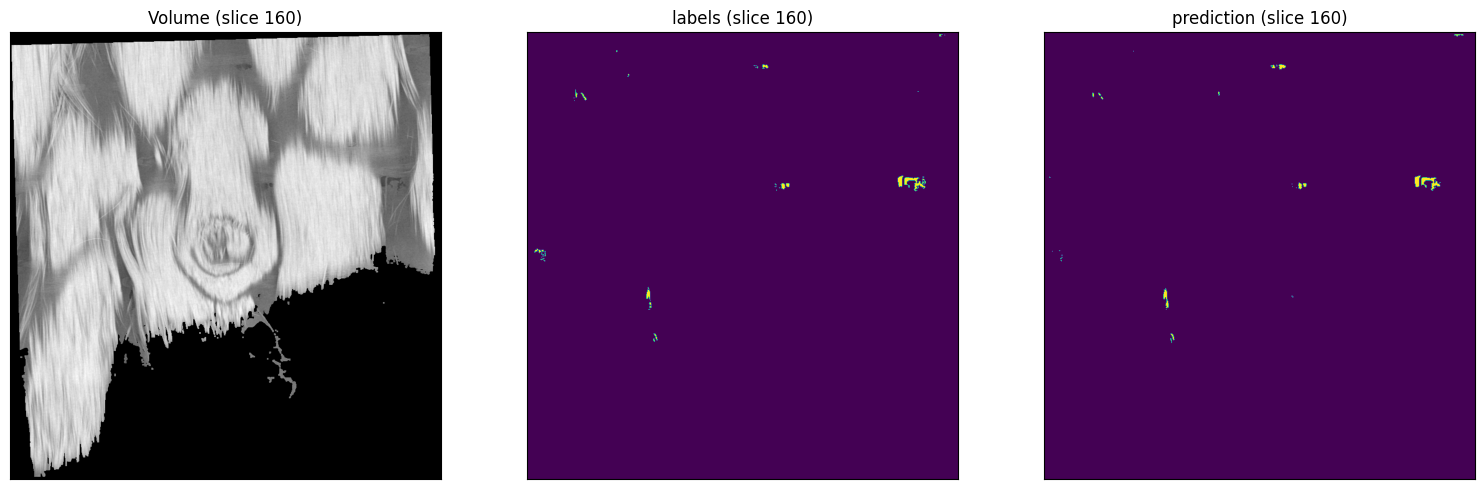

In [30]:
fig, axs = plt.subplots(1,3,figsize=(3*6.3,6.3))
axs = axs.flatten()

slice = 160

axs[0].imshow(data["raw"][:,slice,:],cmap="grey")
axs[1].imshow(data["labels"][:,slice,:])
axs[2].imshow(pred["labels"][:,slice,:])

for ax in axs: ax.set_xticks([]),ax.set_yticks([])
axs[0].set_title("Volume (slice %3.f)" %slice)
axs[1].set_title("labels (slice %3.f)" %slice)
axs[2].set_title("prediction (slice %3.f)" %slice)


In [37]:
import json
path_json = "../checkpoints/pore_run_001/json/"



In [62]:
data_scalar = {}
for file in os.listdir(path_json):
    print(file)
    with open(os.path.join(path_json,file)) as f:
        data_scalar[file] = np.array(json.load(f))

run-logs-tag-train_eval_score_avg.json
run-logs-tag-val_eval_score_avg.json
run-logs-tag-train_loss_avg.json
run-logs-tag-val_loss_avg.json
run-logs-tag-learning_rate.json


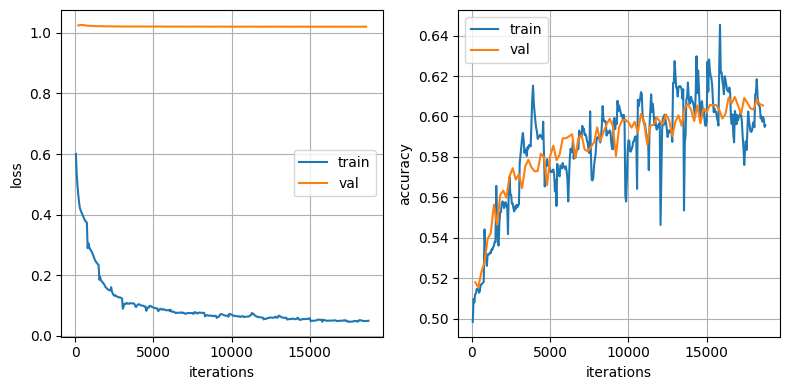

In [77]:
fig, axs = plt.subplots(1,2,figsize=(2*4,4))

axs[0].plot(data_scalar["run-logs-tag-train_loss_avg.json"][:,1],data_scalar["run-logs-tag-train_loss_avg.json"][:,2],label="train")

axs[0].plot(data_scalar["run-logs-tag-val_loss_avg.json"][:,1],data_scalar["run-logs-tag-val_loss_avg.json"][:,2],label="val")


axs[1].plot(data_scalar["run-logs-tag-train_eval_score_avg.json"][:,1],data_scalar["run-logs-tag-train_eval_score_avg.json"][:,2],label="train")

axs[1].plot(data_scalar["run-logs-tag-val_eval_score_avg.json"][:,1],data_scalar["run-logs-tag-val_eval_score_avg.json"][:,2],label="val")

for ax in axs: ax.grid(),ax.legend(), ax.set_xlabel("iterations")

axs[0].set_ylabel("loss")
axs[1].set_ylabel("accuracy")
fig.tight_layout()